In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!ls /content/drive/My\ Drive/ML\ Project/Datasets/

annotations_dynamic.csv  audio_static.csv  lyrics_linguistic.csv
annotations_static.csv	 eda_dynamic.csv   lyrics_tfidf.csv
audio_dynamic.csv	 eda_static.csv


In [ ]:
lyrics_tfidf = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/lyrics_tfidf.csv')
lyrics_linguistic = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/lyrics_linguistic.csv')
audio_static = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/audio_static.csv')
eda_static = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/eda_static.csv')

eda_dataset = eda_static.groupby(by=['musicId'], as_index=False).mean()
#eda_dataset.drop('Valence(mean)', axis=1, inplace=True)
#eda_dataset.drop('Arousal(mean)', axis=1, inplace=True)

In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/ML Project/Datasets/annotations_static.csv')

In [ ]:
lyr = pd.merge(lyrics_tfidf, lyrics_linguistic, on='musicId')
aud_eda = pd.merge(audio_static, eda_dataset, on='musicId')
joined = pd.merge(lyr, aud_eda, on='musicId')

dataset = pd.merge(joined, labels, on='musicId')

In [ ]:
dataset.shape

(603, 7104)

In [ ]:
dataset

,musicId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,medianMFCC[12],kurtMFCC[12],skewMFCC[12],meanMFCC[13],stdMFCC[13],medianMFCC[13],kurtMFCC[13],skewMFCC[13],meanMFCC[14],stdMFCC[14],medianMFCC[14],kurtMFCC[14],skewMFCC[14],meanMFCC[15],stdMFCC[15],medianMFCC[15],kurtMFCC[15],skewMFCC[15],meanMFCC[16],stdMFCC[16],medianMFCC[16],kurtMFCC[16],skewMFCC[16],meanMFCC[17],stdMFCC[17],medianMFCC[17],kurtMFCC[17],skewMFCC[17],meanMFCC[18],stdMFCC[18],medianMFCC[18],kurtMFCC[18],skewMFCC[18],meanMFCC[19],stdMFCC[19],medianMFCC[19],kurtMFCC[19],skewMFCC[19],Arousal(mean),Valence(mean)
0,1.0,0.372514,-1.131089,-4.053200,0.036860,0.433837,4.066642,-0.411591,-0.697551,13.444840,8.207451,10.152243,3.086615,6.660395,1.226224,-1.921786,-9.061651,4.138314,58.377313,-3.848634,-31.818441,109.079625,9.969654,-43.581373,-3.209697,44.874865,-51.925529,21.308090,-72.649160,-5.586233,-40.436786,-29.205944,-19.621266,-1.070990,6.283604,1.691552,1.402843,-3.839832,-7.403585,-10.148920,...,10.850568,-1.099567,-0.230450,11.147463,1.607128,10.973842,-1.365181,0.198079,9.557910,1.513790,9.694053,-1.238141,-0.211467,7.251056,2.364838,7.468220,-1.234989,0.021289,7.545039,1.992864,7.938558,-1.045803,-0.061450,7.067063,1.605247,7.187331,-1.168454,0.073103,6.020834,1.827720,5.848303,-1.272518,0.210816,6.316116,1.296469,6.284431,-1.109246,0.058839,0.4000,0.5750
1,5.0,-0.021232,-0.068678,-2.645587,0.336421,0.208905,1.439549,-0.206336,-0.253360,2.568004,3.105128,2.800969,0.755397,0.765724,2.158505,-0.816359,-1.371121,2.977944,13.123793,-6.092821,-3.370831,7.943003,-0.017072,-1.415148,-0.452847,1.528979,-3.101916,-2.275334,2.764633,-1.626484,-0.623701,6.116583,7.240577,14.770991,-2.813798,0.379839,-9.284438,-1.680256,-0.258568,0.940455,...,9.612092,0.154587,-0.720260,9.745106,1.971931,9.401256,-0.331909,0.291369,8.885936,1.780294,8.548389,-0.767280,0.446664,7.189814,2.301394,7.302894,-0.498715,-0.272944,7.649896,2.018782,7.249729,-0.416304,0.701229,6.865119,1.734704,6.631614,-0.476418,0.447498,5.440623,1.669053,5.489140,0.094945,-0.246738,5.743504,1.581079,5.460894,-0.524067,0.354852,0.1500,0.2000
2,6.0,-0.437151,-0.525415,-0.664850,-0.210955,-0.064710,-0.566562,-0.203647,-0.079869,0.723133,0.203518,0.238339,-0.057843,1.037587,-0.621125,-0.035424,1.520478,0.413578,0.406601,-0.456730,0.463864,0.593440,-0.182471,-0.353375,0.091544,-0.487048,0.204503,-0.284889,0.684036,-0.072291,-0.151283,-0.092355,0.319868,-0.134807,-0.084791,-0.589994,0.293458,0.167845,-0.032148,0.147556,...,6.084352,-1.500000,0.320956,10.498371,2.068294,11.371218,-1.500000,-0.395634,9.454602,1.870859,10.087502,-1.500000,-0.326636,6.279164,2.403212,5.866133,-1.500000,0.056473,9.070453,1.711290,9.430366,-1.500000,-0.236804,7.790318,1.549399,7.932023,-1.500000,-0.021071,4.622217,1.784995,4.157071,-1.500000,0.184870,6.458339,1.493094,6.620252,-1.500000,-0.041720,0.5125,0.3500
3,9.0,0.302196,-0.833174,-1.614257,0.596998,0.106135,-0.987560,-0.259543,-0.100091,-0.150844,0.354404,-0.493431,-0.277419,0.695324,0.896729,-0.492577,0.078962,3.050107,0.647404,-0.502304,0.681047,1.877679,-0.490906,0.494327,-0.140428,-0.445339,1.146197,-1.220509,0.968865,0.736790,0.911823,1.364060,3.858433,3.775644,-1.555420,-0.797959,-1.712967,2.390371,4.768626,-1.007737,...,9.694449,-1.500000,-0.214557,9.151758,1.452264,9.299545,-1.500000,0.083824,7.811983,0.971442,7.854565,-1.500000,0.042519,6.625063,1.334569,6.332924,-1.500000,0.105497,7.146377,0.708097,7.047344,-1.500000,0.158836,6.666533,0.973502,6.456297,-1.500000,0.123654,5.920226,1.416695,5.838139,-1.500000,0.014551,6.091127,0.761465,6.063216,-1.500000,-0.059084,0.4500,0.2875
4,10.0,-0.484528,-0.380687,-1.162074,-0.398932,0.094664,1.049898,1.490700,-0.071681,0.639735,0.061694,-0.593459,-0.230630,-0.653413,-0.891132,-0.206955,-0.433181,-1.352576,2.094398,-0.360030,0.789078,-0.028796,-0.533911,0.347344,-0.347891,1.126449,0.748307,-1.686076,0.626602,2.975630,4.725517,1.250379,0.061392,1.686538,1.462326,-0.7

In [ ]:
y_A = dataset['Arousal(mean)']
y_V = dataset['Valence(mean)']
X = dataset.drop(['Arousal(mean)', 'Valence(mean)', 'musicId'], axis=1)

In [ ]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

In [ ]:
static_results = dict()
static_results['Stacking'] = dict()
static_results['Voting'] = dict()

In [ ]:
#Arousal without PCA
estimators = [('RF', RandomForestRegressor(max_depth=5, n_estimators=40, max_features=2)),
              ('AB', AdaBoostRegressor(random_state=1, n_estimators=40))]
#('LSV', LinearSVR(random_state=2, max_iter=3000))
               
stack_reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(normalize=True))
voting_reg = VotingRegressor(estimators=estimators)

X_train, X_test, y_train, y_test = train_test_split(X, y_A, random_state=3, test_size=0.1, shuffle=True)

stack_model_A_no_pca = stack_reg.fit(X_train, y_train)
y_pred = stack_model_A_no_pca.predict(X_test)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)
print("Stacking Regressor ::: RMSE: {} and MAE: {}".format(rmse_score, mae_score))
static_results['Stacking']['Arousal (no PCA) RMSE'] = rmse_score
static_results['Stacking']['Arousal (no PCA) MAE'] = mae_score
static_results['Stacking']['Arousal (no PCA) Predictions'] = y_pred
static_results['Stacking']['Arousal (no PCA) Labels'] = y_test

vote_model_A_no_pca = voting_reg.fit(X_train, y_train)
y_pred = vote_model_A_no_pca.predict(X_test)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)
print("Voting Regressor ::: RMSE: {} and MAE: {}".format(rmse_score, mae_score))
static_results['Voting']['Arousal (no PCA) RMSE'] = rmse_score
static_results['Voting']['Arousal (no PCA) MAE'] = mae_score
static_results['Voting']['Arousal (no PCA) Predictions'] = y_pred
static_results['Voting']['Arousal (no PCA) Labels'] = y_test

Stacking Regressor ::: RMSE: 0.11710255959393817 and MAE: 0.09802906659276013
Voting Regressor ::: RMSE: 0.12593644188160005 and MAE: 0.10512807416862469


In [ ]:
pickle.dump(stack_model_A_no_pca, open('Stack_Arousal_noPCA.sav', 'wb'))
pickle.dump(vote_model_A_no_pca, open('Vote_Arousal_noPCA.sav', 'wb'))

In [ ]:
#Valence without PCA
estimators = [('RF', RandomForestRegressor(max_depth=5, n_estimators=40, max_features=2)),
              ('AB', AdaBoostRegressor(random_state=1, n_estimators=40))]
#('LSV', LinearSVR(random_state=2, max_iter=3000))
               
stack_reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(normalize=True))
voting_reg = VotingRegressor(estimators=estimators)

X_train, X_test, y_train, y_test = train_test_split(X, y_V, random_state=3, test_size=0.1, shuffle=True)

stack_model_V_no_pca = stack_reg.fit(X_train, y_train)
y_pred = stack_model_V_no_pca.predict(X_test)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)
print("Stacking Regressor ::: RMSE: {} and MAE: {}".format(rmse_score, mae_score))
static_results['Stacking']['Valence (no PCA) RMSE'] = rmse_score
static_results['Stacking']['Valence (no PCA) MAE'] = mae_score
static_results['Stacking']['Valence (no PCA) Predictions'] = y_pred
static_results['Stacking']['Valence (no PCA) Labels'] = y_test

vote_model_V_no_pca = voting_reg.fit(X_train, y_train)
y_pred = vote_model_V_no_pca.predict(X_test)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)
print("Voting Regressor ::: RMSE: {} and MAE: {}".format(rmse_score, mae_score))
static_results['Voting']['Valence (no PCA) RMSE'] = rmse_score
static_results['Voting']['Valence (no PCA) MAE'] = mae_score
static_results['Voting']['Valence (no PCA) Predictions'] = y_pred
static_results['Voting']['Valence (no PCA) Labels'] = y_test

Stacking Regressor ::: RMSE: 0.11225101806428546 and MAE: 0.08941676084188709
Voting Regressor ::: RMSE: 0.11966783800471828 and MAE: 0.09580010268418436


In [ ]:
pickle.dump(stack_model_V_no_pca, open('Stack_Valence_noPCA.sav', 'wb'))
pickle.dump(vote_model_V_no_pca, open('Vote_Valence_noPCA.sav', 'wb'))

In [ ]:
from google.colab import files
files.download('/content/Stack_Arousal_noPCA.sav')
files.download('/content/Stack_Valence_noPCA.sav')
files.download('/content/Vote_Arousal_noPCA.sav')
files.download('/content/Vote_Valence_noPCA.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class MyPCA:
	def __init__(self):
		pass

	def perform_PCA(self, X, n_components=3):
		cols = ['column'+str(i) for i in range(X.shape[1])]
		X.columns = cols

		X = StandardScaler().fit_transform(X)
		self.X = X
		self.n_components = n_components

		self.pca = PCA(self.n_components)
		self.pca_dims = self.pca.fit_transform(self.X)

		self.pca_result = pd.DataFrame(data = self.pca_dims)
		return self.pca_result

	def explain_variance(self):
		print("Explained Variance per Principal Component:\n{}".format(self.pca.explained_variance_ratio_))

	def plot_variance(self):
		plt.rcParams["figure.figsize"] = (24,12)
		fig, ax = plt.subplots()
		xi = np.arange(1, self.pca_result.shape[1]+1, step=1)
		y = np.cumsum(self.pca.explained_variance_ratio_)

		plt.ylim(0.0, 1.1)
		plt.plot(xi, y, marker='o', linestyle='--', color='b')
		plt.xlabel('Number of Features')
		plt.ylabel('Cumulative Variance Percentage')
		plt.title('Variance explained through Number of Features')

		plt.axhline(y=self.n_components, color='r', linestyle='-')
		ax.grid(axis='x')
		plt.show()

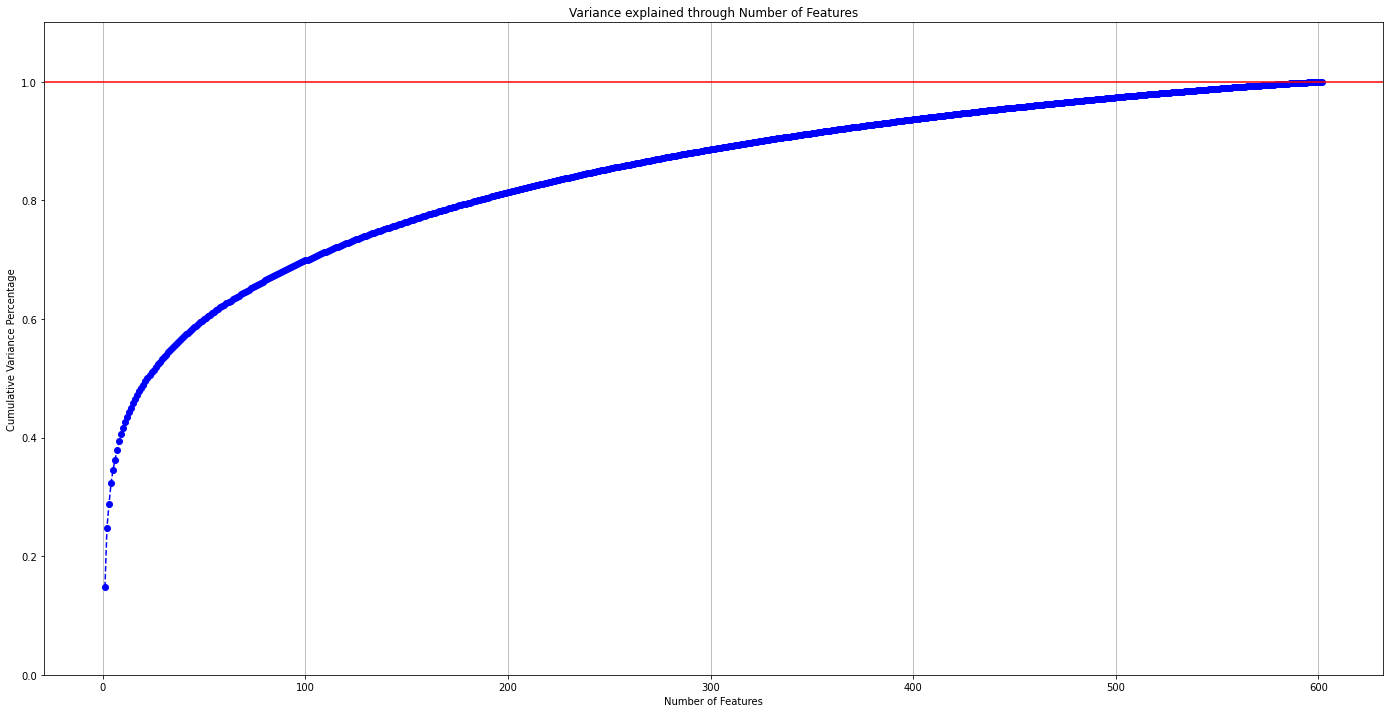

In [ ]:
pca = MyPCA()
X_pca = pca.perform_PCA(X, n_components=0.9999)
pca.plot_variance()

In [ ]:
X_pca.shape

(603, 602)

In [ ]:
#Arousal with PCA
estimators = [('RF', RandomForestRegressor(max_depth=5, n_estimators=40, max_features=2)),
              ('AB', AdaBoostRegressor(random_state=1, n_estimators=40))]
#('LSV', LinearSVR(random_state=2, max_iter=3000))
               
stack_reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(normalize=True))
voting_reg = VotingRegressor(estimators=estimators)

X_pca_s = StandardScaler().fit_transform(X_pca)
X_train, X_test, y_train, y_test = train_test_split(X_pca_s, y_A, random_state=3, test_size=0.1, shuffle=True)

stack_model_A_pca = stack_reg.fit(X_train, y_train)
y_pred = stack_model_A_pca.predict(X_test)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)
print("Stacking Regressor ::: RMSE: {} and MAE: {}".format(rmse_score, mae_score))
static_results['Stacking']['Arousal (PCA) RMSE'] = rmse_score
static_results['Stacking']['Arousal (PCA) MAE'] = mae_score
static_results['Stacking']['Arousal (PCA) Predictions'] = y_pred
static_results['Stacking']['Arousal (PCA) Labels'] = y_test

vote_model_A_pca = voting_reg.fit(X_train, y_train)
y_pred = vote_model_A_pca.predict(X_test)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)
print("Voting Regressor ::: RMSE: {} and MAE: {}".format(rmse_score, mae_score))
static_results['Voting']['Arousal (PCA) RMSE'] = rmse_score
static_results['Voting']['Arousal (PCA) MAE'] = mae_score
static_results['Voting']['Arousal (PCA) Predictions'] = y_pred
static_results['Voting']['Arousal (PCA) Labels'] = y_test

Stacking Regressor ::: RMSE: 0.11781720235308019 and MAE: 0.09343920009476589
Voting Regressor ::: RMSE: 0.1417150811018216 and MAE: 0.11650191207324058


In [ ]:
pickle.dump(stack_model_A_pca, open('Stack_Arousal_PCA.sav', 'wb'))
pickle.dump(vote_model_A_pca, open('Vote_Arousal_PCA.sav', 'wb'))

In [ ]:
#Valence with PCA
estimators = [('RF', RandomForestRegressor(max_depth=5, n_estimators=40, max_features=2)),
              ('AB', AdaBoostRegressor(random_state=1, n_estimators=40))]
#('LSV', LinearSVR(random_state=2, max_iter=3000))
               
stack_reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(normalize=True))
voting_reg = VotingRegressor(estimators=estimators)

X_pca_s = StandardScaler().fit_transform(X_pca)
X_train, X_test, y_train, y_test = train_test_split(X_pca_s, y_V, random_state=3, test_size=0.1, shuffle=True)

stack_model_V_pca = stack_reg.fit(X_train, y_train)
y_pred = stack_model_V_pca.predict(X_test)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)
print("Stacking Regressor ::: RMSE: {} and MAE: {}".format(rmse_score, mae_score))
static_results['Stacking']['Valence (PCA) RMSE'] = rmse_score
static_results['Stacking']['Valence (PCA) MAE'] = mae_score
static_results['Stacking']['Valence (PCA) Predictions'] = y_pred
static_results['Stacking']['Valence (PCA) Labels'] = y_test

vote_model_A_pca = voting_reg.fit(X_train, y_train)
y_pred = vote_model_A_pca.predict(X_test)
rmse_score = mean_squared_error(y_test, y_pred, squared=False)
mae_score = mean_absolute_error(y_test, y_pred)
print("Voting Regressor ::: RMSE: {} and MAE: {}".format(rmse_score, mae_score))
static_results['Voting']['Valence (PCA) RMSE'] = rmse_score
static_results['Voting']['Valence (PCA) MAE'] = mae_score
static_results['Voting']['Valence (PCA) Predictions'] = y_pred
static_results['Voting']['Valence (PCA) Labels'] = y_test

Stacking Regressor ::: RMSE: 0.12636273946319626 and MAE: 0.10109870211758183
Voting Regressor ::: RMSE: 0.13826461317535385 and MAE: 0.11026823121990877


In [ ]:
pickle.dump(stack_model_A_pca, open('Stack_Valence_PCA.sav', 'wb'))
pickle.dump(vote_model_A_pca, open('Vote_Valence_PCA.sav', 'wb'))

In [ ]:
from google.colab import files
files.download('/content/Stack_Arousal_PCA.sav')
files.download('/content/Stack_Valence_PCA.sav')
files.download('/content/Vote_Arousal_PCA.sav')
files.download('/content/Vote_Valence_PCA.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

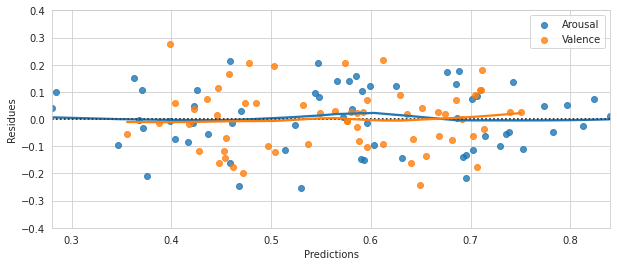

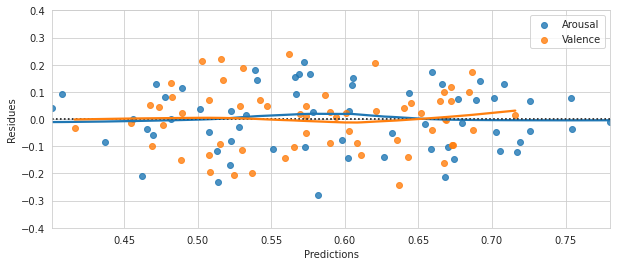

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
preds_As = static_results['Stacking']['Arousal (no PCA) Predictions']
preds_Vs = static_results['Stacking']['Valence (no PCA) Predictions']
plt.figure(figsize=(10,4))
sns.residplot(x=preds_As, y=static_results['Stacking']['Arousal (no PCA) Labels'], lowess=True, label='Arousal')
sns.residplot(x=preds_Vs, y=static_results['Stacking']['Valence (no PCA) Labels'], lowess=True, label='Valence')
plt.xlabel('Predictions')
plt.ylabel('Residues')
plt.legend()
#plt.xticks(ticks=np.arange(np.min(preds), np.max(preds), 6))
plt.yticks(ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4])
plt.show()

import seaborn as sns
sns.set_style("whitegrid")
preds_Av = static_results['Voting']['Arousal (no PCA) Predictions']
preds_Vv = static_results['Voting']['Valence (no PCA) Predictions']
plt.figure(figsize=(10,4))
sns.residplot(x=preds_Av, y=static_results['Voting']['Arousal (no PCA) Labels'], lowess=True, label='Arousal')
sns.residplot(x=preds_Vv, y=static_results['Voting']['Valence (no PCA) Labels'], lowess=True, label='Valence')
plt.xlabel('Predictions')
plt.ylabel('Residues')
plt.legend()
#plt.xticks(ticks=np.arange(np.min(preds), np.max(preds), 6))
plt.yticks(ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4])
plt.show()

<Figure size 720x288 with 0 Axes>

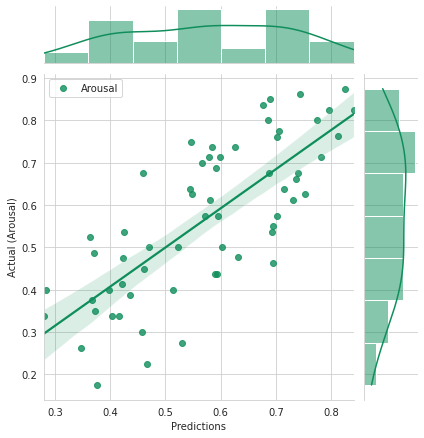

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
preds_As = static_results['Stacking']['Arousal (no PCA) Predictions']
preds_Vs = static_results['Stacking']['Valence (no PCA) Predictions']
plt.figure(figsize=(10,4))
sns.jointplot(x=preds_As, y=static_results['Stacking']['Arousal (no PCA) Labels'], label='Arousal', kind='reg', color='#0F8E5B')
plt.xlabel('Predictions')
plt.ylabel('Actual (Arousal)')
plt.legend()
#plt.xticks(ticks=np.arange(np.min(preds), np.max(preds), 6))
#plt.yticks(ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4])
plt.show()

<Figure size 720x288 with 0 Axes>

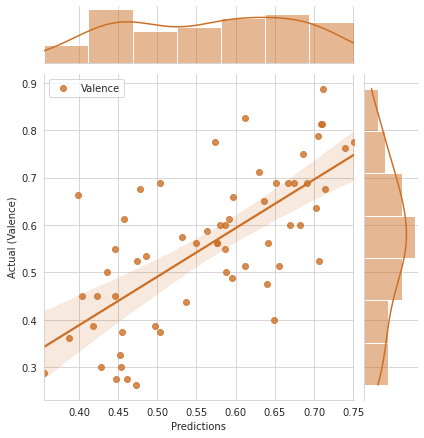

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
preds_As = static_results['Stacking']['Arousal (no PCA) Predictions']
preds_Vs = static_results['Stacking']['Valence (no PCA) Predictions']
plt.figure(figsize=(10,4))
sns.jointplot(x=preds_Vs, y=static_results['Stacking']['Valence (no PCA) Labels'], label='Valence', kind='reg', color='#CC7027')
plt.xlabel('Predictions')
plt.ylabel('Actual (Valence)')
plt.legend()
#plt.xticks(ticks=np.arange(np.min(preds), np.max(preds), 6))
#plt.yticks(ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4])
plt.show()

((array([-2.28017173, -1.92017484, -1.7091256 , -1.55469152, -1.43036801,
         -1.3249031 , -1.23241216, -1.14940983, -1.07365152, -1.00360143,
         -0.93815914, -0.87650695, -0.81801894, -0.76220403, -0.70866868,
         -0.65709167, -0.60720655, -0.55878903, -0.51164772, -0.46561731,
         -0.42055328, -0.37632784, -0.33282677, -0.28994682, -0.24759369,
         -0.20568029, -0.16412527, -0.12285188, -0.08178679, -0.04085922,
          0.        ,  0.04085922,  0.08178679,  0.12285188,  0.16412527,
          0.20568029,  0.24759369,  0.28994682,  0.33282677,  0.37632784,
          0.42055328,  0.46561731,  0.51164772,  0.55878903,  0.60720655,
          0.65709167,  0.70866868,  0.76220403,  0.81801894,  0.87650695,
          0.93815914,  1.00360143,  1.07365152,  1.14940983,  1.23241216,
          1.3249031 ,  1.43036801,  1.55469152,  1.7091256 ,  1.92017484,
          2.28017173]),
  array([-0.25451342, -0.24248809, -0.23272042, -0.20075387, -0.15834984,
         -0.15

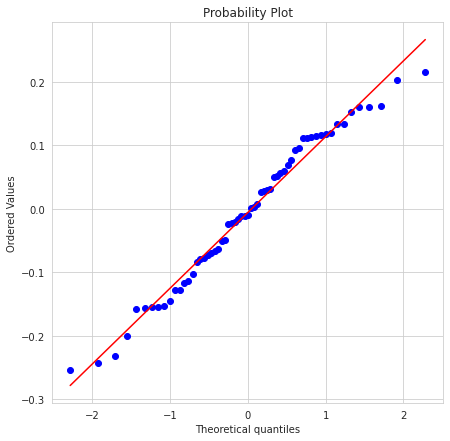

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(7,7))
residuals_s = static_results['Stacking']['Arousal (no PCA) Labels'] - preds_As.reshape(-1)
stats.probplot(residuals, dist='norm', plot=plt)